In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

In [2]:
ser = Service('../chromedriver/chromedriver.exe')

driver = webdriver.Chrome(service = ser)

In [3]:
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(3)

In [4]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/{}/'.format(word)
    return url

In [5]:
word = '제주도맛집'
url = insta_searching(word)
url

'https://www.instagram.com/explore/tags/제주도맛집/'

In [6]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(3)

In [7]:
# 지원안함
first = driver.find_element_by_css_selector('div._9AhH0')
first.click()
time.sleep(3)

C:\Users\sara\AppData\Local\Temp/ipykernel_11072/1320061655.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  first = driver.find_element_by_css_selector('div._9AhH0')


In [8]:
from selenium.webdriver.common.by import By

In [10]:
first = driver.find_element(By.CSS_SELECTOR,'div._9AhH0')
first.click()
time.sleep(3)

In [11]:
def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR,'div._9AhH0')
    first.click()
    time.sleep(3)

In [12]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [13]:
import re
import unicodedata     # 한글깨짐 개선

In [23]:
# content,  tags, like, place

content = soup.select('div.C4VMK > span')[0].text
tags = soup.select('span > .xil3i')[0].text
#like = soup.select('div > a.zV_Nj > span')[0].text
#place = soup.select('div.JF9hh > a')[0].text

In [24]:
import re

word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(7)

first = driver.find_element(By.CSS_SELECTOR,'div._9AhH0')
first.click()
time.sleep(5)  

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [25]:
tags = soup.select('span > .xil3i')
tag = [ tag.text for tag in tags ]
tag

['#제주맛집',
 '#제주도맛집',
 '#제주아쿠아플라넷',
 '#표선맛집',
 '#성산맛집',
 '#성산일출봉맛집',
 '#구좌읍맛집',
 '#구좌맛집',
 '#비자림맛집',
 '#안돌오름',
 '#광치기해변맛집',
 '#제주고기국수',
 '#제주도고기국수',
 '#성산아침식사',
 '#스타애드']

In [26]:
content = soup.select('div.C4VMK > span')[0].text
tags = re.findall(r'#[^\s,\\]+', content)
tags

['#제주맛집',
 '#제주도맛집',
 '#제주아쿠아플라넷#표선맛집',
 '#성산맛집',
 '#성산일출봉맛집',
 '#구좌읍맛집',
 '#구좌맛집',
 '#비자림맛집',
 '#안돌오름',
 '#광치기해변맛집',
 '#제주고기국수#제주도고기국수',
 '#성산아침식사']

In [27]:
date = soup.select('div > time')[0]['datetime'][:10]

##### 인스타크램에서 content 저장하는 함수 만들기

In [28]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try : 
        content = soup.select('div.C4VMK > span')[0].text
    except :
        content = ''
    
    try : 
        tags = re.findall(r'#[^\s,\\]+', content) 
    except :
        tags = ''
        
    date = soup.select('div > time')[0]['datetime'][:10]
    
    try :
        like = soup.select('div > a.zV_Nj > span')[0].text
    except :
        like = 0
        
    try :
        place = soup.select('div.JF9hh > a')[0].text
    except :
        place = ''
        
    data = [content, date, tags, like, place]
    
       
    return data

##### 다음페이지로 넘기는 함수 만들기

In [29]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR,'div.l8mY4.feth3')
    right.click()
    time.sleep(3) 

In [30]:
move_next(driver)

In [ ]:
import re

word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(10)

first = driver.find_element(By.CSS_SELECTOR,'div._9AhH0')
first.click()
time.sleep(3)  

In [ ]:
def get_data_insta(num, driver):
    result = []
    for i in range(num):
        result.append(get_content(driver))
        move_next(driver)
    
    return result

In [31]:
def insta_crawling(word, num):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(7)
    
    select_first(driver)
    time.sleep(3)
    
    result = []
    
    for i in range(num):
        try:
            result.append(get_content(driver))
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
    
    return result

In [32]:
df = pd.DataFrame(insta_crawling('제주도맛집', 10), 
                  columns = ['content', 'date', 'tags', 'like', 'place'])

##### 중복값 제거를 위한 엑셀파일 통합(교재)

In [34]:
jeju_insta_df = pd.DataFrame( [ ] )

folder = './files/'
f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

jeju_insta_df.columns =['content','data','like','place','tags']

In [35]:
jeju_insta_df.shape

(12780, 5)

##### 중복값 제거

In [36]:
jeju_insta_df.drop_duplicates(subset=['content'], inplace = True)
jeju_insta_df.shape

(8369, 5)

In [37]:
jeju_insta_df.to_excel('./files/1_crawling_raw.xlsx', index = False)

###### 해시태그 데이터 가져오기

In [38]:
raw_total = jeju_insta_df.copy()

In [39]:
raw_total.columns
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [40]:
raw_total['tags'][0].str[2:-2]

0    #제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛집추...
0    #제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만...
0                                                     
0                                                 #제주도
Name: tags, dtype: object

In [41]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [42]:
from collections import Counter
tag_counts = Counter(tags_total)
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

###### 불용어 제거

In [43]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', 
             '#제주자연눈썹','#서귀포눈썹문신', '#제주눈썹문신', 
             '#소통', '#맞팔','#제주일상','#제주속눈썹','#눈썹문신',
             '#제주스타그램','#여행','#제주도관광','#선팔','#제주도그램',
             '#jeju','#서귀포','#제주여행', '#제주관광', '#제주도',
             '#제주', '#제주도여행','#제주살이','#제주가볼만한곳',
             '#제주반영구','#제주시','#서귀포반영구','#서귀포속눈썹',
             '#제주남자눈썹문신', '#서귀포자연눈썹','#서귀포남자눈썹문신',
             '#카멜리아힐','#daily','#제주메이크업','#가족여행','#제주도여행코스'
             '#셀카','#제주해안도로','#제주속눈썹연장','#제주문신','#좋아요',
             '#첫줄', '#첫줄','#제주두피반영구','#서귀포문신','#제주실탄사격장',
             '#데일리','#서귀포여행','#제주도여행코스','#jejuisland','#셀카',
             '#제주공항','#제주실내관광지','#성산일출봉','#제주도민',
             '#여행스타그램','#제주반영구수강','#두피반영구','#jejudo',
             '#제주버스여행','#여행에미치다']

tag_total_selected = []
for tag in tags_total :
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#중문맛집', 404),
 ('#먹스타그램', 395),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#성산맛집', 316),
 ('#제주시맛집', 311),
 ('#서귀포맛집추천', 303),
 ('#한림맛집', 263),
 ('#제주도카페', 258),
 ('#오설록', 241),
 ('#제주도이색맛집', 240),
 ('#제주공항근처맛집', 231),
 ('#맛집', 223),
 ('#맛스타그램', 223),
 ('#제주공항맛집', 207),
 ('#신라호텔제주', 205),
 ('#제주도핫플레이스', 201),
 ('#롯데호텔제주', 199),
 ('#서귀포카페', 198),
 ('#제주중문맛집', 194),
 ('#제주도맛집추천', 187),
 ('#제주도가족여행', 183),
 ('#제주도핫플', 183),
 ('#먹방', 179),
 ('#월정리맛집', 178),
 ('#한라산', 178),
 ('#휘닉스아일랜드', 174)]

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32","win64"]:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

In [45]:
tag_count_df = pd.DataFrame(tag_counts_selected.most_common(50), 
                            columns = ['tags','counts'])
tag_count_df.head()

# delete blank
tag_count_df['tags'].replace('',None, inplace = True)
tag_count_df.dropna(subset = ['tags'], inplace=True)
tag_count_df.head()

,tags,counts
0,#제주맛집,3412
1,#제주도맛집,3149
2,#서귀포맛집,1330
3,#제주도가볼만한곳,1014
4,#제주핫플레이스,835


<AxesSubplot:xlabel='counts', ylabel='tags'>

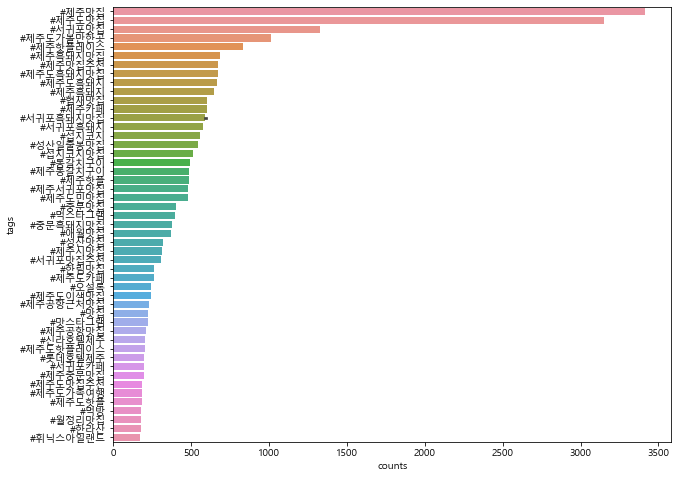

In [46]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'counts',  y = 'tags', data = tag_count_df)

### 지도 시각화

In [48]:
location_counts = raw_total['place'].value_counts( )
location_counts

Jeju                        241
Jeju-do                     172
Jungle Book by Alice        101
Seogwipo                     65
제주도 크리스마스 박물관                59
                           ... 
에코랜드 라벤다앤그린티로즈가든역             1
청사포 수민이네                      1
제주몬트락                         1
Jeju National University      1
디스이즈핫                         1
Name: place, Length: 1027, dtype: int64

In [49]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [50]:
location_counts_df.to_excel('./files/3_location_counts.xlsx')

In [51]:
locations = list(location_counts_df.index)